In [79]:
import warnings
warnings.filterwarnings('ignore')

In [73]:
import pandas as pd

df=pd.read_csv('../homeprices.csv')
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


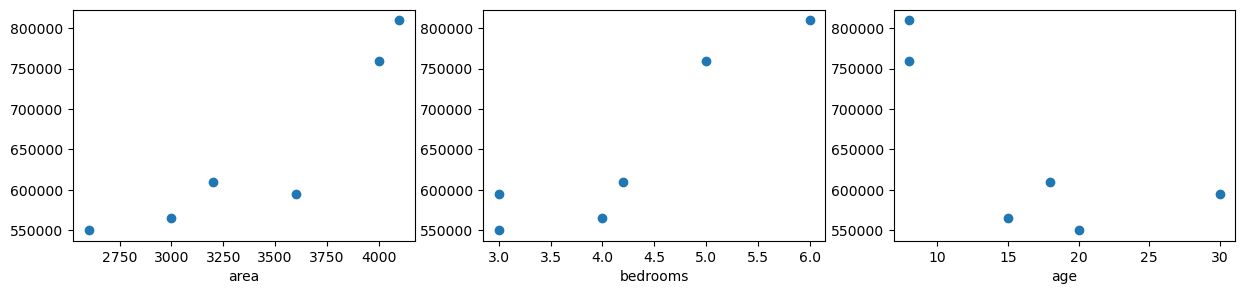

In [121]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15, 3))
ax[0].scatter(df['area'], df['price'])
ax[0].set_xlabel('area')
ax[1].scatter(df['bedrooms'], df['price'])
ax[1].set_xlabel('bedrooms')
ax[2].scatter(df['age'], df['price'])
ax[2].set_xlabel('age')
plt.show()

## Check for null rows

In [74]:
null_rows=df[df.isnull().any(axis=1)]
print(null_rows)

   area  bedrooms  age   price
2  3200       NaN   18  610000


## Method 1 : Drop null rows

In [26]:
df=df.dropna()

## Method 2: Fill null cells with column median

In [70]:
median_bedrooms=df['bedrooms'].median()
print(median_bedrooms)
df['bedrooms']=df['bedrooms'].fillna(median_bedrooms)

4.0


## Method 2: Fill null cells with column mean

In [75]:
mean_bedrooms=df['bedrooms'].mean()
print(mean_bedrooms)
df['bedrooms']=df['bedrooms'].fillna(mean_bedrooms)

4.2


In [76]:
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [131]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

print(X.shape)
print(y.shape)
print(X[:, 0])

(6, 3)
(6,)
[2600. 3000. 3200. 3600. 4000. 4100.]


In [126]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(X, y)

LinearRegression()

In [127]:
pred=model.predict(X)

In [128]:
from sklearn.metrics import mean_squared_error, r2_score
import math

rmse=math.sqrt(mean_squared_error(y, pred))
r2=r2_score(y, pred)
print(rmse)
print(r2)

21342.51165894494
0.9540926625396439


231586.00639409182


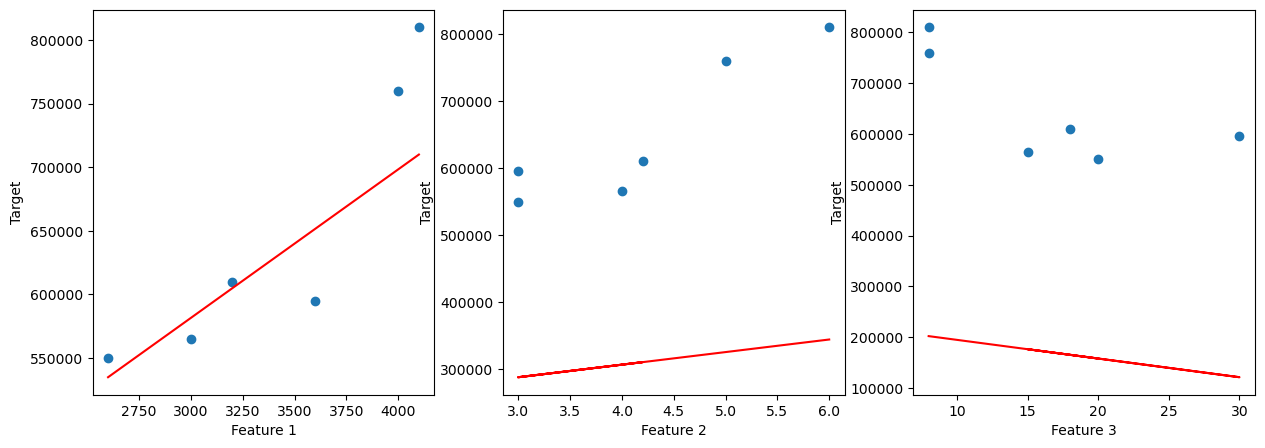

In [141]:
print(model.intercept_)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot and regression line for the first feature
axs[0].scatter(X[:, 0], y)
axs[0].plot(X[:, 0], X[:, 0]*model.coef_[0]+intercept, color='red')

# Scatter plot and regression line for the second feature
axs[1].scatter(X[:, 1], y)
axs[1].plot(X[:, 1], X[:, 1]*model.coef_[1]+intercept, color='red')

# Scatter plot and regression line for the third feature
axs[2].scatter(X[:, 2], y)
axs[2].plot(X[:, 2], X[:, 2]*model.coef_[2]+intercept, color='red')

# Add labels and title
for i in range(3):
    axs[i].set_xlabel('Feature {}'.format(i+1))
    axs[i].set_ylabel('Target')
plt.show()
